In [68]:
%matplotlib inline 
import json
import pandas as pd
import networkx as nx
import caselawnet

In [3]:
data_path = '/media/sf_VBox_Shared/CaseLaw/graphs/lido/civielrecht_hr.json'
with open(data_path) as f:
    network = json.load(f)

In [7]:
nodes = pd.DataFrame(network['nodes'])
nodes.head()

,abstract,articles,authorities,betweenness_centrality,closeness_centrality,community,count_annotation,count_version,creator,date,...,out_degree,out_degree_centrality,pagerank,procedure,rel_in_degree,subject,title,x,y,year
0,Art. 81 lid 1 RO. Verbintenissenrecht. Overeen...,[81 ro],0.0,0.0,0.0,999,0,3,HR,31-10-2014,...,0,0.0,0.000066,"[Artikel 81 RO-zaken, Cassatie]",0.0,Civiel recht,"Hoge Raad, 31-10-2014, 11/04717",0.314499,0.766658,2014
1,Art. 81 lid 1 RO. Opstalrecht. AV2000. Gebonde...,"[81 ro, 3:14 bw]",0.0,0.0,0.0,1000,0,3,HR,31-10-2014,...,0,0.0,0.000066,"[Artikel 81 RO-zaken, Cassatie]",0.0,Civiel recht,"Hoge Raad, 31-10-2014, 13/00523",0.739216,0.758092,2014
2,Art. 81 lid 1 RO. Opstalrecht. AV70. Gebondenh...,[81 ro],0.0,0.0,0.0,1001,0,3,HR,31-10-2014,...,0,0.0,0.000066,"[Artikel 81 RO-zaken, Cassatie]",0.0,Civiel recht,"Hoge Raad, 31-10-2014, 13/00525",0.067934,0.743661,2014
3,IPR. Internationale bevoegdheid Nederlandse re...,[],0.0,0.0,0.0,1002,0,6,HR,31-10-2014,...,0,0.0,0.000066,[Cassatie],0.0,Civiel recht,"Hoge Raad, 31-10-2014, 14/00819",0.978493,0.744506,2014
4,"Opstalrecht. AV70, AV2000. Gebondenheid opstal...",[],0.0,0.0,0.0,1003,1,7,HR,31-10-2014,...,0,0.0,0.000066,[Cassatie],0.0,Civiel recht,"Hoge Raad, 31-10-2014, 13/00529",0.564381,0.262196,2014


In [24]:
# filter nodes on degree larger than zero
nodes = nodes[nodes['degree']>0]

In [34]:
print(nodes.shape)
nodes.head()

(3830, 27)


,abstract,articles,authorities,betweenness_centrality,closeness_centrality,community,count_annotation,count_version,creator,date,...,out_degree,out_degree_centrality,pagerank,procedure,rel_in_degree,subject,title,x,y,year
5,Contractenrecht; opschortingsrecht. Uitleg van...,[],0.000000e+00,0.0,0.000082,380,2,12,HR,31-10-2014,...,1,0.000082,0.000066,[Cassatie],0.000000,Civiel recht,"Hoge Raad, 31-10-2014, 13/03115",0.010217,0.757124,2014
6,Onrechtmatige overheidsdaad. Vervolg op HR 20 ...,[],0.000000e+00,0.0,0.000082,1004,1,9,HR,31-10-2014,...,1,0.000082,0.000066,[Cassatie],0.000000,Civiel recht,"Hoge Raad, 31-10-2014, 13/03269",0.126978,0.945714,2014
8,Bewijsrecht. Voldoende geconcretiseerd en gesp...,[],0.000000e+00,0.0,0.000163,192,1,7,HR,31-10-2014,...,2,0.000163,0.000066,[Cassatie],0.000000,Civiel recht,"Hoge Raad, 31-10-2014, 13/03880",0.324555,0.001694,2014
9,"Stakingsrecht. Art. 6, aanhef en onder 4, ESH....",[],3.508703e-244,0.0,0.000000,836,2,13,HR,31-10-2014,...,0,0.000000,0.000080,[Cassatie],0.111111,Civiel recht,"Hoge Raad, 31-10-2014, 13/04468",0.853631,0.740192,2014
12,Faillissementsrecht. Onverschuldigde betaling ...,[],0.000000e+00,0.0,0.000183,49,2,8,HR,31-10-2014,...,2,0.000163,0.000066,[Cassatie],0.000000,Civiel recht; Insolventierecht,"Hoge Raad, 31-10-2014, 13/01712",0.578717,0.234629,2014


In [51]:
network_filtered = caselawnet.get_network(nodes.to_dict('records'), network['edges'])

In [52]:
nodes_filtered, links_filtered = network_filtered

In [59]:
caselawnet.utils.to_sigma_json(nodes_filtered, links_filtered, 'Civielrecht HR', '/media/sf_VBox_Shared/CaseLaw/graphs/lido/civielrecht_hr_filtered.json')

In [54]:
nodes_df = pd.DataFrame(nodes_filtered)

In [57]:
nodes_df['abstract'].str.len().value_counts()[:10]

0      636
1      626
376     14
233     13
189     13
320     13
330     12
333     12
281     12
186     12
Name: abstract, dtype: int64

In [62]:
nodes_df.groupby('subject')['subject'].count().sort_values(ascending=False)

subject
Civiel recht                                                                 3147
Civiel recht; Personen- en familierecht                                       314
Civiel recht; Insolventierecht                                                203
Civiel recht,Bestuursrecht; Omgevingsrecht                                    100
Civiel recht; Ondernemingsrecht                                                34
Civiel recht,Bestuursrecht; Europees bestuursrecht                             16
Civiel recht,Strafrecht                                                         7
Bestuursrecht,Civiel recht                                                      3
Civiel recht; Arbeidsrecht                                                      2
Civiel recht,Bestuursrecht; Socialezekerheidsrecht                              2
Civiel recht; Personen- en familierecht,Civiel recht; Verbintenissenrecht       1
Civiel recht; Mededingingsrecht                                                 1
Name: su

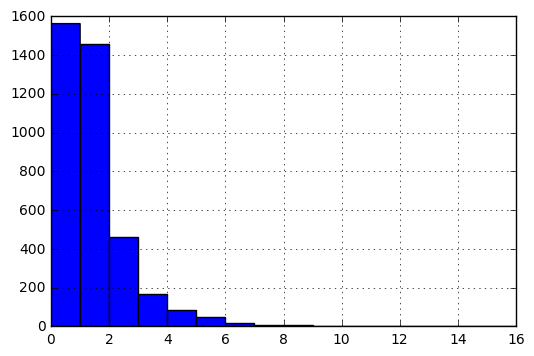

In [77]:
nodes_df['in_degree'].hist(bins=range(max(nodes_df['in_degree'])))

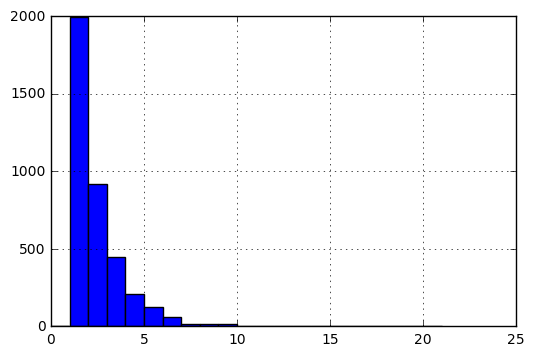

In [79]:
nodes_df['degree'].hist(bins=range(max(nodes_df['degree'])))

In [80]:
nodes_df['community'].value_counts()

34     104
19     100
76      97
0       84
20      76
17      75
21      72
79      71
24      63
54      62
68      61
99      60
23      56
25      55
35      55
50      53
9       52
5       52
49      51
69      51
128     48
14      47
153     47
31      45
41      44
63      43
16      40
123     39
48      39
4       29
      ... 
188      2
392      2
217      2
551      2
554      2
489      2
601      2
137      2
346      2
464      2
547      2
86       2
378      2
609      2
196      2
617      2
101      2
503      2
559      2
190      2
22       2
394      2
544      2
603      2
334      2
353      2
622      2
634      2
265      2
585      2
Name: community, Length: 657, dtype: int64